# Stationary Cylindrical Anisotropic Fluid by Debbasch et al
##  Geoff Cope
##  Univeristy of Utah
##  𐐏𐐭𐑌𐐲𐑂𐐲𐑉𐑅𐐮𐐻𐐨 𐐲𐑂 𐐏𐐭𐐻𐐫
##  December 30, 2021 

In [1]:
from sympy import init_session
init_session(use_latex=True)

IPython console for SymPy 1.9 (Python 3.8.8-64-bit) (ground types: gmpy)

These commands were executed:
>>> from __future__ import division
>>> from sympy import *
>>> x, y, z, t = symbols('x y z t')
>>> k, m, n = symbols('k m n', integer=True)
>>> f, g, h = symbols('f g h', cls=Function)
>>> init_printing()

Documentation can be found at https://docs.sympy.org/1.9/



In [2]:
import warnings
import matplotlib.cbook
warnings.filterwarnings("ignore",category=matplotlib.cbook.mplDeprecation)

In [3]:
t,r,z,phi,dt,dr,dz,dphi = symbols('t r z phi dt dr dz dphi')

In [4]:
f = Function('f')(r)
f

In [5]:
k = Function('k')(r)
k

In [7]:
gamma = Function('gamma')(r)
gamma

In [6]:
l = Function('l')(r)
l

In [9]:
variables = Matrix([t,r,z,phi])
variables

⎡t⎤
⎢ ⎥
⎢r⎥
⎢ ⎥
⎢z⎥
⎢ ⎥
⎣φ⎦

In [8]:
differentials = Matrix([dt,dr,dz,dphi])
differentials 

⎡ dt ⎤
⎢    ⎥
⎢ dr ⎥
⎢    ⎥
⎢ dz ⎥
⎢    ⎥
⎣dphi⎦

In [10]:
lineElement = expand ( -f*dt**2 + 2*k*dt*dphi + exp(2*gamma) * (dr**2 + dz**2) + l * dphi**2 ) 
lineElement

In [11]:
g = zeros(4)

for i in range(4):
    for j in range(4):
        if i == j:
            g[i,j] = lineElement.coeff( differentials[i],2 ) 
        else:
            g[i,j] = Rational(1,2)*lineElement.coeff( differentials[i]*differentials[j],1 )
            
g

⎡-f(r)     0        0     k(r)⎤
⎢                             ⎥
⎢        2⋅γ(r)               ⎥
⎢  0    ℯ           0      0  ⎥
⎢                             ⎥
⎢                 2⋅γ(r)      ⎥
⎢  0       0     ℯ         0  ⎥
⎢                             ⎥
⎣k(r)      0        0     l(r)⎦

In [12]:
import sympy

In [13]:
m = sympy.Array(g)
m

⎡-f(r)     0        0     k(r)⎤
⎢                             ⎥
⎢        2⋅γ(r)               ⎥
⎢  0    ℯ           0      0  ⎥
⎢                             ⎥
⎢                 2⋅γ(r)      ⎥
⎢  0       0     ℯ         0  ⎥
⎢                             ⎥
⎣k(r)      0        0     l(r)⎦

In [14]:
from einsteinpy.symbolic import *

In [15]:
syms = sympy.symbols("t r z phi")
t,r,z,phi = syms

In [16]:
metric = MetricTensor(m,syms)

In [17]:
ch = ChristoffelSymbols.from_metric(metric)
simplify(ch.tensor())

⎡⎡                                    d               d                                     
⎢⎢                               k(r)⋅──(k(r)) + l(r)⋅──(f(r))                              
⎢⎢                                    dr              dr                                    
⎢⎢              0                ─────────────────────────────  0                0          
⎢⎢                                     ⎛             2   ⎞                                  
⎢⎢                                   2⋅⎝f(r)⋅l(r) + k (r)⎠                                  
⎢⎢                                                                                          
⎢⎢     d               d                                                d               d   
⎢⎢k(r)⋅──(k(r)) + l(r)⋅──(f(r))                                    k(r)⋅──(l(r)) - l(r)⋅──(k
⎢⎢     dr              dr                                               dr              dr  
⎢⎢─────────────────────────────                0                0  ───

In [18]:
Ric = RicciTensor.from_metric(metric)
Ric.tensor()

⎡⎛              2                                                   2             2         
⎢⎜             d               d        d                 ⎛d       ⎞       2     d          
⎢⎜2⋅f(r)⋅l(r)⋅───(f(r)) + f(r)⋅──(f(r))⋅──(l(r)) + 2⋅f(r)⋅⎜──(k(r))⎟  + 2⋅k (r)⋅───(f(r)) - 
⎢⎜              2              dr       dr                ⎝dr      ⎠              2         
⎢⎝            dr                                                                dr          
⎢───────────────────────────────────────────────────────────────────────────────────────────
⎢                                                               ⎛             2   ⎞         
⎢                                                             4⋅⎝f(r)⋅l(r) + k (r)⎠         
⎢                                                                                           
⎢                                                                                           
⎢                                                                     

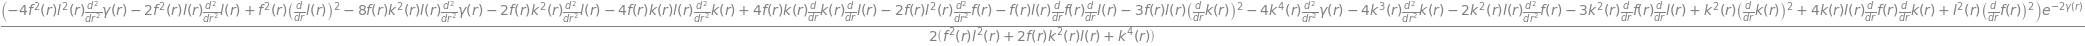

In [19]:
R = RicciScalar.from_riccitensor(Ric)
R.simplify()
R.expr

In [20]:
einst = EinsteinTensor.from_metric(metric)
einst.tensor()

⎡     ⎛                  2                        2                         2               
⎢     ⎜     2     2     d             2          d           2    ⎛d       ⎞            2   
⎢0.25⋅⎜- 4⋅f (r)⋅l (r)⋅───(γ(r)) - 2⋅f (r)⋅l(r)⋅───(l(r)) + f (r)⋅⎜──(l(r))⎟  - 8⋅f(r)⋅k (r)
⎢     ⎜                  2                        2               ⎝dr      ⎠                
⎢     ⎝                dr                       dr                                          
⎢───────────────────────────────────────────────────────────────────────────────────────────
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                     

In [21]:
#  rm1 = RiemannCurvatureTensor.from_christoffels(ch)
#  rm1.tensor()

In [22]:
#  weyl = WeylTensor.from_metric(metric)
#  weyl.tensor()

In [23]:
ricciSimplified = simplify(Ric.tensor())
ricciSimplified

⎡⎛              2                                                   2             2         
⎢⎜             d               d        d                 ⎛d       ⎞       2     d          
⎢⎜2⋅f(r)⋅l(r)⋅───(f(r)) + f(r)⋅──(f(r))⋅──(l(r)) + 2⋅f(r)⋅⎜──(k(r))⎟  + 2⋅k (r)⋅───(f(r)) - 
⎢⎜              2              dr       dr                ⎝dr      ⎠              2         
⎢⎝            dr                                                                dr          
⎢───────────────────────────────────────────────────────────────────────────────────────────
⎢                                                               ⎛             2   ⎞         
⎢                                                             4⋅⎝f(r)⋅l(r) + k (r)⎠         
⎢                                                                                           
⎢                                                                                           
⎢                                                                     

In [24]:
einsteinSimplifed = simplify(einst.tensor())
einsteinSimplifed

⎡             ⎛                    2                          2                             
⎢             ⎜       3     2     d               3          d               3    ⎛d       ⎞
⎢             ⎜- 4.0⋅f (r)⋅l (r)⋅───(γ(r)) - 2.0⋅f (r)⋅l(r)⋅───(l(r)) + 1.0⋅f (r)⋅⎜──(l(r))⎟
⎢             ⎜                    2                          2                   ⎝dr      ⎠
⎢             ⎝                  dr                         dr                              
⎢             ──────────────────────────────────────────────────────────────────────────────
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                     

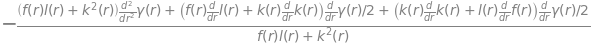

In [25]:
ricciSimplified[2,2]